# 实验一 #
## 设计计算机程序，产生序列并计算序列的DTFT，绘制其幅频特性和相频特性曲线；

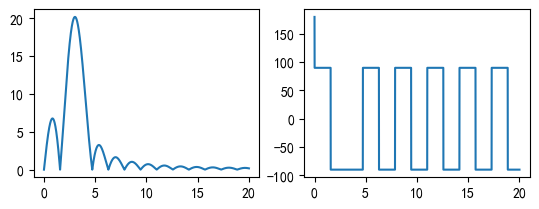

In [8]:

import math
import numpy as np
# 三角函数sin(nπ)的DTFT
 
class dtft():
    def __init__(self,xvalues:list):
        '''
        :param xvalues: 时域自变量t序列
        '''
        self.yvalues = []
        self.xvalues = xvalues
 
    def xjw(self,fre:list):
        '''
        :param fre: 频率自变量fre序列
        :return:
        '''
        # 实现yvalues为X（jw）频谱值
        ## 遍历频率自变量
        for f in fre:
            p = 0
            # 遍历时间序列，得到累加和
            for x in self.xvalues:
                p = np.sin(x*np.pi)*math.e**(-1j*f*x) + p
            self.yvalues.append(p) # 对应每一个自变量频率的因变量值
 
if __name__ == '__main__':
    import numpy as np
    from matplotlib import pyplot as plt
    xvalues = np.arange(-2,2,0.1)
    ###print(xvalues)
    y1 = [np.sin(i*np.pi) for i in xvalues]
    #print(np.sin(-1*np.pi))
    # 频谱
    DTFT = dtft(xvalues)
    freOmega = np.arange(0,20,0.001)
    DTFT.xjw(freOmega)
    # 幅度谱
    plt.subplot(223)
    plt.plot(freOmega,np.abs(DTFT.yvalues))
    # 相位谱
    plt.subplot(224)
    angle_ = np.angle(DTFT.yvalues)/np.pi
    plt.plot(freOmega,180*angle_)
    plt.show()



## 根据系统的单位脉冲响应和差分方程，计算系统的频率响应，绘制系统频率响应的幅频特性和相频特性曲线；

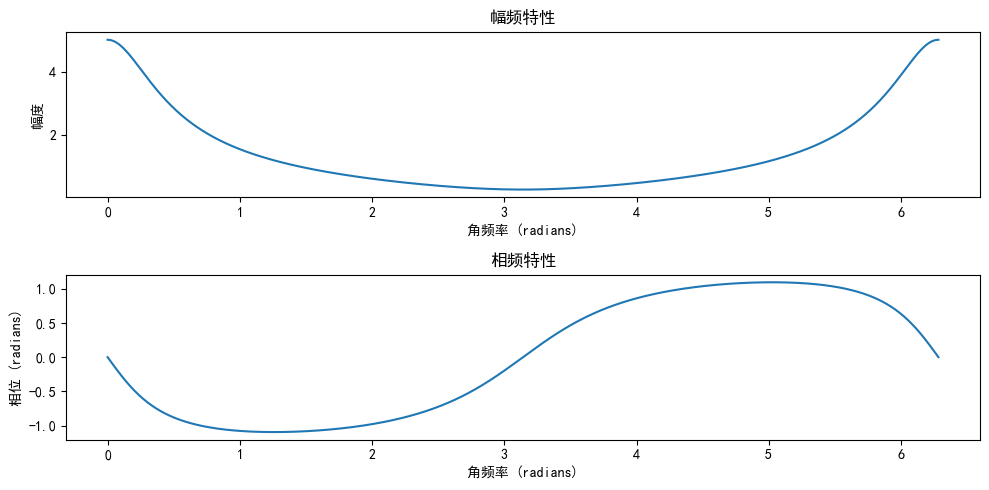

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 系统的传递函数系数
b = [1, 0.5]  # 输出系数
a = [1, -0.7]  # 输入系数

# 计算频率响应
w = np.linspace(0, 2 * np.pi, 1000)  # 角频率范围
H = np.polyval(b, np.exp(1j * w)) / np.polyval(a, np.exp(1j * w))  # 计算传递函数在不同频率下的值

# 绘制幅频特性曲线
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(H))
plt.title('幅频特性')
plt.xlabel('角频率 (radians)')
plt.ylabel('幅度')

# 绘制相频特性曲线
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(H))
plt.title('相频特性')
plt.xlabel('角频率 (radians)')
plt.ylabel('相位 (radians)')

plt.tight_layout()
plt.show()


## 根据系统的单位脉冲响应和差分方程，计算系统的系统函数、零极点分布；改变系统的零极点分布，观察系统频率响应的变化。

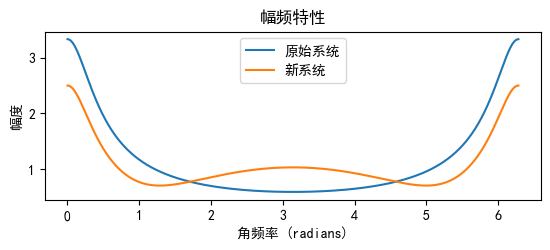

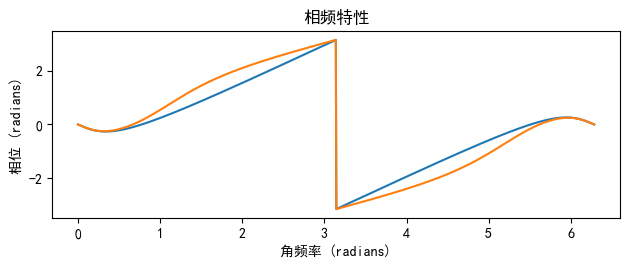

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 原始的传递函数系数
b_original = [1, 0, 0]  # 原始零点在原点
a_original = [1, -0.7]

# 新的传递函数系数
b_new = [1, -0.5, 0.25]  # 新的零点分布
a_new = [1, -0.7]

# 角频率范围
w = np.linspace(0, 2 * np.pi, 1000)

# 计算原始系统的频率响应
H_original = np.polyval(b_original, np.exp(1j * w)) / np.polyval(a_original, np.exp(1j * w))

# 计算新系统的频率响应
H_new = np.polyval(b_new, np.exp(1j * w)) / np.polyval(a_new, np.exp(1j * w))

# 绘制幅频特性曲线

plt.subplot(2, 1, 1)
plt.plot(w, np.abs(H_original), label='原始系统')
plt.plot(w, np.abs(H_new), label='新系统')
plt.legend()
plt.title('幅频特性')
plt.xlabel('角频率 (radians)')
plt.ylabel('幅度')
plt.show()


plt.subplot(2, 1, 2)
plt.plot(w, np.angle(H_original), label='原始系统')
plt.plot(w, np.angle(H_new), label='新系统')
plt.title('相频特性')
plt.xlabel('角频率 (radians)')
plt.ylabel('相位 (radians)')

plt.tight_layout()
plt.show()


# 实验二

## 设计计算机程序，产生序列并计算序列的FFT和IFFT，绘制其幅频特性和相频特性曲线；

d:\anaconda\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


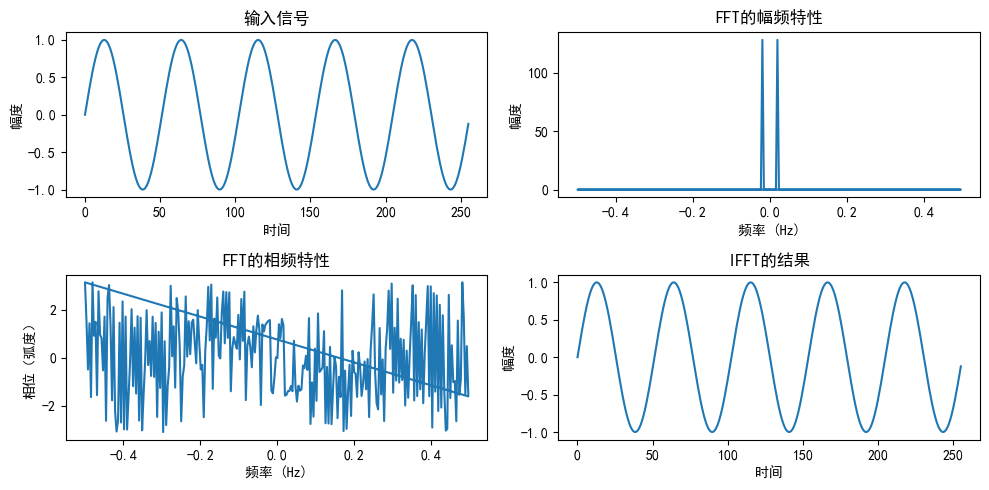

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 生成输入序列（示例为一个正弦波信号）
N = 256  # 序列长度
n = np.arange(N)  # 时间索引
f = 5.0  # 正弦波的频率
x = np.sin(2 * np.pi * f * n / N)  # 生成正弦波信号

# 计算FFT
X = np.fft.fft(x)

# 计算IFFT
x_reconstructed = np.fft.ifft(X)

# 计算频率轴
fs = 1.0  # 采样频率
frequencies = np.fft.fftfreq(N, 1/fs)

# 绘制输入信号
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(n, x)
plt.title('输入信号')
plt.xlabel('时间')
plt.ylabel('幅度')

# 绘制FFT的幅频特性
plt.subplot(2, 2, 2)
plt.plot(frequencies, np.abs(X))
plt.title('FFT的幅频特性')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')

# 绘制FFT的相频特性
plt.subplot(2, 2, 3)
plt.plot(frequencies, np.angle(X))
plt.title('FFT的相频特性')
plt.xlabel('频率 (Hz)')
plt.ylabel('相位（弧度）')

# 绘制IFFT的结果
plt.subplot(2, 2, 4)
plt.plot(n, x_reconstructed)
plt.title('IFFT的结果')
plt.xlabel('时间')
plt.ylabel('幅度')

plt.tight_layout()
plt.show()


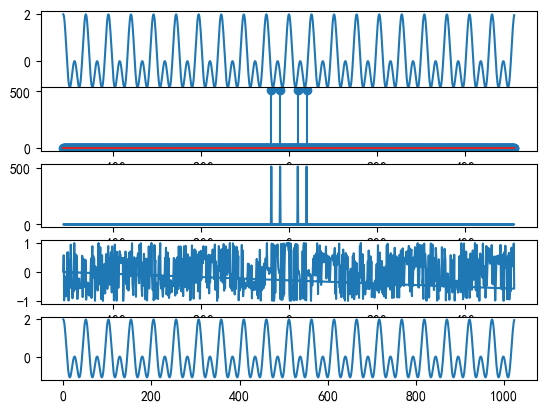

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def get_data(sample_time,f_s):
    f = 20
    t = np.linspace(0, sample_time, sample_time*f_s, endpoint=False)
    y = np.cos(f * 2 * np.pi * t) + np.cos(2*f * 2 * np.pi * t)
    return y

def demo_fft():
    fig = plt.figure()
    s_t = 1
    f_s = 1024
    y = get_data(s_t, f_s)
    # signal wave
    ax = fig.add_subplot(4, 1, 1)
    ax.plot(y)

    yf = np.fft.fft(y)
    xf = np.fft.fftfreq(len(yf), 1/len(yf))
    # frequency
    ax = fig.add_subplot(5, 1, 2)
    ax.stem(xf, np.abs(yf))

    ax = fig.add_subplot(5, 1, 3)
    ax.plot(xf, yf)

    ax = fig.add_subplot(5, 1, 4)
    angle_ = np.angle(yf)/np.pi
    ax.plot(xf,angle_)

    yifft = np.fft.ifft(yf)
    ax = fig.add_subplot(5, 1, 5)
    ax.plot(yifft.real)
    



demo_fft()

## 模拟产生离散系统的输入序列和单位脉冲响应，利用FFT和IFFT算法计算系统的输出响应，分析FFT的计算长度对系统输出响应的影响；

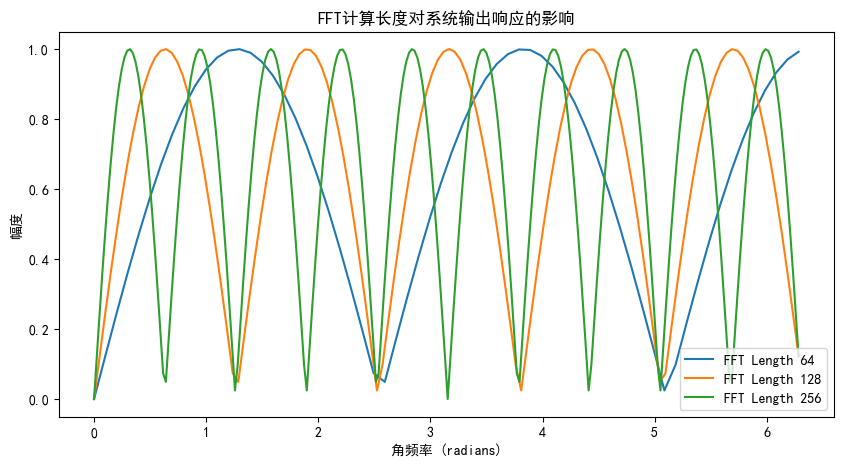

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 生成输入序列（示例为一个正弦波信号）
N = 256  # 序列长度
n = np.arange(N)  # 时间索引
f = 5.0  # 正弦波的频率
x = np.sin(2 * np.pi * f * n / N)  # 生成正弦波信号

# 生成单位脉冲响应
impulse_response = np.zeros(N)
impulse_response[0] = 1

# 选择不同的FFT计算长度
fft_lengths = [64, 128, 256]

# 绘制系统输出响应的幅频特性
plt.figure(figsize=(10, 5))
for fft_length in fft_lengths:
    # 计算FFT
    X = np.fft.fft(x, fft_length)
    H = np.fft.fft(impulse_response, fft_length)

    # 计算系统的输出响应频谱
    Y = X * H

    # 计算系统的输出响应时域
    y = np.fft.ifft(Y, fft_length)

    # 绘制输出响应的幅频特性
    w = np.linspace(0, 2 * np.pi, fft_length)
    plt.plot(w, np.abs(y), label=f'FFT Length {fft_length}')

plt.legend()
plt.title('FFT计算长度对系统输出响应的影响')
plt.xlabel('角频率 (radians)')
plt.ylabel('幅度')
plt.show()


## 模拟产生连续时间信号，选取适当的采样频率对其采样，并用FFT算法计算其频谱，分析信号的观测时间长度、FFT的计算长度对信号频谱计算结果的影响。

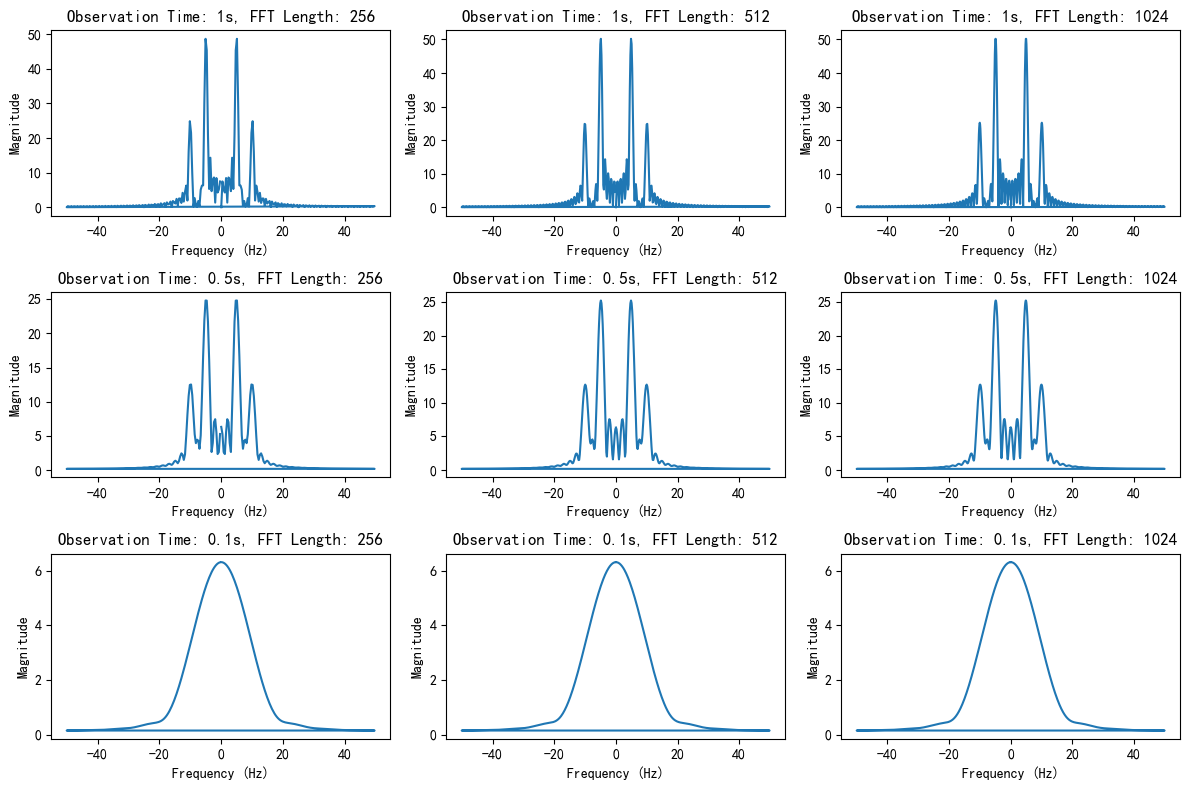

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 生成连续时间信号
t_continuous = np.linspace(0, 1, 1000)  # 连续时间范围从0到1秒
continuous_signal = np.sin(2 * np.pi * 5 * t_continuous) + 0.5 * np.sin(2 * np.pi * 10 * t_continuous)

# 选择采样频率
fs = 100  # 采样频率为100 Hz
t_discrete = np.arange(0, 1, 1/fs)  # 生成离散时间点
discrete_signal = np.interp(t_discrete, t_continuous, continuous_signal)  # 采样连续时间信号

# 选择不同的观测时间长度
observation_lengths = [1, 0.5, 0.1]  # 观测时间长度分别为1秒，0.5秒，0.1秒

# 选择不同的FFT计算长度
fft_lengths = [256, 512, 1024]  # FFT计算长度分别为256点，512点，1024点

# 绘制频谱图
plt.figure(figsize=(12, 8))
for observation_length in observation_lengths:
    for fft_length in fft_lengths:
        num_samples = int(observation_length * fs)
        signal_segment = discrete_signal[:num_samples]

        # 计算FFT
        spectrum = np.abs(np.fft.fft(signal_segment, fft_length))

        # 计算频率轴
        freq_axis = np.fft.fftfreq(fft_length, 1/fs)

        # 绘制频谱
        plt.subplot(len(observation_lengths), len(fft_lengths), observation_lengths.index(observation_length) * len(fft_lengths) + fft_lengths.index(fft_length) + 1)
        plt.plot(freq_axis, spectrum)
        plt.title(f'Observation Time: {observation_length}s, FFT Length: {fft_length}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()
